# Trabalho 2 - Aprendizagem Automática

###### João Verdilheiro, 38156

## Data Input

#### Imports

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

### Conjunto de treino

In [138]:
data_train = pd.read_csv('train.csv')

# mapeia a coluna relativa ao genero para que também seja utilizada no modelo
data_train['gender'] = data_train['gender'].map({'f': 1, 'm': 0})

# Drop das colunas gender slice_loc e id
X_train = data_train.drop(['id','slice_loc'], axis=1)
X_train.head()

,age,gender,ADC_avg,Skewness,Kurtosis,GLCM_mean1,GLCM_mean2,GLCM_var1,GLCM_var2,GLCM_energy,GLCM_entropy,GLCM_contrast,GLCM_homogenity,GLCM_correlation,GLCM_prominence,GLCM_shade,diagnosis
0,35,1,1926.655,2.491,-0.379,16.034,15.379,28.033,30.339,0.012,4.489,13.638,0.289,0.774,-0.883,-1.300,0
1,35,1,1391.693,2.263,0.302,11.386,11.307,23.307,27.331,0.010,4.949,13.596,0.319,0.734,0.741,1.263,0
2,35,1,1665.625,2.418,0.372,13.650,13.781,23.328,31.746,0.012,4.562,21.631,0.241,0.615,0.841,1.349,0
3,35,1,1661.389,2.294,-0.191,13.667,14.014,9.667,11.597,0.022,3.923,18.514,0.185,0.136,0.300,1.278,0
4,35,1,1267.880,4.923,1.068,10.280,9.650,11.642,14.488,0.031,3.720,11.590,0.353,0.575,1.045,1.511,0


In [139]:
data_train.describe()

,id,age,gender,ADC_avg,Skewness,Kurtosis,GLCM_mean1,GLCM_mean2,GLCM_var1,GLCM_var2,GLCM_energy,GLCM_entropy,GLCM_contrast,GLCM_homogenity,GLCM_correlation,GLCM_prominence,GLCM_shade,diagnosis
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,156.258088,43.684559,0.561029,1135.151374,5.172243,0.728021,9.196013,9.461174,4.390944,6.792465,0.081524,3.211708,5.308258,0.541414,0.503299,0.884012,1.234082,0.541912
std,56.439842,19.943512,0.496444,431.616814,4.451735,1.066231,3.681725,3.605919,5.000633,7.555451,0.071872,0.778109,5.459707,0.133020,0.174293,0.982252,1.382966,0.498424
min,55.000000,1.000000,0.000000,282.689000,1.466000,-4.750000,2.087000,2.483000,0.134000,0.150000,0.008000,0.942000,0.240000,0.185000,-0.163000,-2.371000,-3.193000,0.000000
25%,109.750000,32.000000,0.000000,861.964750,2.918750,0.086000,6.857750,7.012750,1.142000,2.008000,0.033000,2.665500,1.748500,0.444750,0.394000,0.698750,1.320750,0.000000
50%,151.000000,49.000000,1.000000,1061.909500,3.776500,0.625000,8.593500,8.853500,2.650500,4.127000,0.056000,3.272000,3.390000,0.540000,0.527500,1.089500,1.539500,1.000000
75%,205.000000,60.000000,1.000000,1334.934250,5.732250,1.348250,10.894250,11.232250,5.541000,8.773000,0.106000,3.783000,7.007750,0.642000,0.628250,1.421000,1.891500,1.000000
max,260.000000,79.000000,1.000000,2993.487000,72.763000,7.469000,25.077000,24.621000,42.030000,57.083000,0.543000,5.141000,47.781000,0.883000,0.914000,4.584000,6.016000,1.000000


In [140]:
print(data_train.groupby('diagnosis').size())

diagnosis
0    623
1    737
dtype: int64


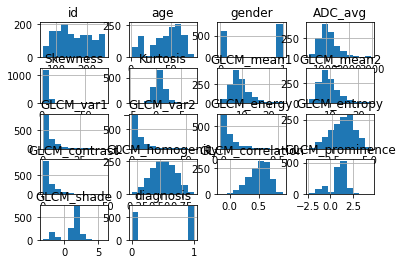

In [141]:
data_train.hist()
plt.show()

Nos diferentes gráficos podemos observar as diferentes distribuições de cada atributo, sendo que existe algumas variações principalmente ao analizar o atributo gender, em que os seus valores são bastante dispares.

### Conjunto de Teste

In [142]:
data_test = pd.read_csv('test.csv')
data_test['gender'] = data_test['gender'].map({'f': 1, 'm': 0})

# Drop das colunas gender slice_loc e id
X_test = data_test.drop(['id','slice_loc'], axis=1)
X_test.head()

,age,gender,ADC_avg,Skewness,Kurtosis,GLCM_mean1,GLCM_mean2,GLCM_var1,GLCM_var2,GLCM_energy,GLCM_entropy,GLCM_contrast,GLCM_homogenity,GLCM_correlation,GLCM_prominence,GLCM_shade
0,48,1,1204.118,3.054,-0.568,9.853,9.860,0.949,1.076,0.095,2.600,1.081,0.645,0.467,-0.599,-1.306
1,48,1,1064.387,2.343,-0.535,8.645,8.726,1.519,1.780,0.070,2.831,1.742,0.535,0.475,-0.642,-1.274
2,48,1,1075.514,2.152,-0.277,8.743,8.821,1.734,2.204,0.055,3.063,1.621,0.549,0.594,0.412,1.298
3,48,1,1233.333,2.763,0.784,9.958,10.542,1.957,2.561,0.111,2.456,1.542,0.604,0.741,1.116,1.367
4,48,1,1168.261,3.142,-0.147,9.565,9.641,0.941,1.100,0.099,2.534,1.293,0.601,0.370,0.672,1.370


## Tratamento dos dados

In [143]:
# Dividir as variavéis dependentes e independentes 

# y_train tem o resultado esperado
y_train = X_train['diagnosis']
y_train = np.array(y_train)

In [144]:
X_train = X_train.drop('diagnosis', axis = 1)

# X_train contem os valores em cada coluna (s/ 'diagnosis')
X_train = np.array(X_train)

#### Standard Scaler

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### Afinação de parâmetros

Para afinar os diferentes parâmetros de cada modelo foi utilizado o Grid Search para que fossem testados diferentes parâmetros de forma a obter valores com boas previsões.

## KN Model

In [146]:
from sklearn.neighbors import KNeighborsClassifier
clf_kn = GridSearchCV(KNeighborsClassifier(), {
        'n_neighbors' : [1, 5, 10, 19, 20, 21, 25, 30, 50],
}, cv = 5, return_train_score = False)

clf_kn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 19, 20, 21, 25, 30, 50]})

In [147]:
df = pd.DataFrame(clf_kn.cv_results_)
df[['param_n_neighbors','mean_test_score','rank_test_score']].sort_values(by=['rank_test_score'])

,param_n_neighbors,mean_test_score,rank_test_score
4,20,0.699265,1
5,21,0.691176,2
3,19,0.686765,3
6,25,0.683824,4
8,50,0.680147,5
7,30,0.678676,6
1,5,0.675735,7
2,10,0.675735,7
0,1,0.657353,9


In [148]:
clf_kn.best_params_

{'n_neighbors': 20}

##### Análise

Sendo k = 1, a exatidão do modelo sobre o conjunto de validação é de 0.65, demonstrando um ligeiro sobre-ajustamento comparando ao desempenho no conjunto de teste (0.61), ainda assim existe um sub-ajustamento ao conjunto de treino. Com isto foi testado de novo o algoritmo, com k=5, obtendo uma exatidão de 0.67 no conjunto de validação e a mesma exatidão no conjunto de teste, continuando com um grande sub-ajustamento.
Dos 'k' testados o melhor desempenho foi de k=20, sendo que ainda assim existe sub-ajustamento devido á baixa exatidão.

## SVM

In [149]:
from sklearn import svm
clf = GridSearchCV(svm.SVC(gamma='auto'), {
        'gamma' : [0.01, 0.1, 1],
        'C' : [1,100, 0.1],
        'kernel': ['rbf', 'linear']
}, cv = 5, return_train_score = False)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 100, 0.1], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']})

In [150]:
df = pd.DataFrame(clf.cv_results_)
df[['param_C','param_kernel', 'param_gamma','mean_test_score','rank_test_score']].sort_values(by=['rank_test_score'])

,param_C,param_kernel,param_gamma,mean_test_score,rank_test_score
0,1,rbf,0.01,0.702206,1
14,0.1,rbf,0.1,0.683824,2
6,100,rbf,0.01,0.677941,3
1,1,linear,0.01,0.675735,4
3,1,linear,0.1,0.675735,4
5,1,linear,1,0.675735,4
2,1,rbf,0.1,0.675735,7
15,0.1,linear,0.1,0.675000,8
13,0.1,linear,0.01,0.675000,8
17,0.1,linear,1,0.675000,8


In [151]:
clf.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

##### Análise

Para o modelo SVM, inicialmente foi definido um gamma= 0.1 e C = 0.1, no entanto a sua exatidão perante o conjunto de validação foi de apenas 0.55, demonstrando sobre-ajustamento.
De seguida foi aumentado o C para que a complexidade do modelo não fosse demasiado baixa, obtendo os valores de gamma = 0.01, e C = 100. Passando assim a ter uma exatidão no conjunto de validação de 0.70, demonstrado uma boa exatidão, no entanto existe sub-ajustamento relativamente ao conjunto de treino.

## Decision Tree

In [152]:
from sklearn import tree
clf_tree = GridSearchCV(tree.DecisionTreeClassifier(), {
        'max_depth' : [None, 5, 9, 10, 11],
        'criterion': ['gini', 'entropy']
}, cv = 5, return_train_score = False)

clf_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 9, 10, 11]})

In [153]:
df = pd.DataFrame(clf_tree.cv_results_)
df[['param_max_depth','param_criterion','mean_test_score','rank_test_score']].sort_values(by=['rank_test_score'])

,param_max_depth,param_criterion,mean_test_score,rank_test_score
8,10,entropy,0.684559,1
6,5,entropy,0.674265,2
7,9,entropy,0.674265,2
2,9,gini,0.671324,4
1,5,gini,0.670588,5
9,11,entropy,0.648529,6
4,11,gini,0.647794,7
3,10,gini,0.647059,8
5,None,entropy,0.646324,9
0,None,gini,0.636029,10


In [154]:
clf_tree.best_params_

{'criterion': 'entropy', 'max_depth': 10}

###### Análise

O modelo desenvolvido foi inicialmente testado sem qualquer alteração de parâmetros sendo que a sua exatidão no conjunto de validação foi de 0.63, sendo que no conjunto de teste foi de 0.66, demonstrando um claro sub-ajustamento.
Na segunda tentativa foi incluido uma profundidade máxima de 10, sendo que a exatidão no conjunto de validação acabou por ser de 0.67 e sobre o conjunto de teste continuou de 0.66, demonstrando algum equilibrio na exatidão sendo que existe ainda assim sub-ajustamento.

## Gaussian Naive Bays

In [155]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

###### Análise

Para o algoritmo Naive Bays foi utilizado o algoritmo de Gausse visto ser o mais indicado para atributos continuos. Aplicando o modelo ao conjuto de treino foi obtida uma exatidão de cerca de 0.70, sendo que que aplicando ao conjunto de teste a exatidão obtida foi de 0.64 .

## Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = GridSearchCV(RandomForestClassifier(), {
        'n_estimators' : [150, 100],
        'max_depth' : [None, 5, 10],
        'criterion': ['gini', 'entropy']
}, cv = 5, return_train_score = False)

clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'n_estimators': [150, 100]})

In [157]:
df = pd.DataFrame(clf_rf.cv_results_)
df[['param_n_estimators','param_max_depth','param_criterion','mean_test_score','rank_test_score']].sort_values(by=['rank_test_score'])

,param_n_estimators,param_max_depth,param_criterion,mean_test_score,rank_test_score
3,100,5,gini,0.701471,1
8,150,5,entropy,0.700735,2
9,100,5,entropy,0.700000,3
0,150,None,gini,0.699265,4
5,100,10,gini,0.699265,4
2,150,5,gini,0.697794,6
4,150,10,gini,0.692647,7
11,100,10,entropy,0.690441,8
7,100,None,entropy,0.688971,9
1,100,None,gini,0.687500,10


In [158]:
clf_rf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

###### Análise

Utilizando um n_estimator = 100, a exatidão do modelo aplicado ao conjunto de validação é de 0.68, demonstrando um claro sub-ajustamento.A exatidão do modelo sobre o conjunto de teste foi de 0.64, podendo assim observar algum sobre-ajustamento.

## Gradient Boosting

In [159]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GridSearchCV(GradientBoostingClassifier(), {
        'max_depth' : [None, 5, 10],
        'learning_rate' : [0.1, 0.2, 0.3],
        'n_estimators' : [100],
}, cv = 5, return_train_score = False)

clf_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [None, 5, 10], 'n_estimators': [100]})

In [160]:
df = pd.DataFrame(clf_gb.cv_results_)
df[['param_learning_rate','param_max_depth','param_n_estimators','mean_test_score','rank_test_score']].sort_values(by=['rank_test_score'])

,param_learning_rate,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
8,0.3,10,100,0.683824,1
1,0.1,5,100,0.679412,2
4,0.2,5,100,0.678676,3
5,0.2,10,100,0.675000,4
7,0.3,5,100,0.670588,5
2,0.1,10,100,0.668382,6
6,0.3,None,100,0.637500,7
3,0.2,None,100,0.634559,8
0,0.1,None,100,0.633088,9


In [161]:
clf_gb.best_params_

{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 100}

###### Análise

Ao utilizar o modelo de Gradient Boosting a exatidão obtida no conjunto de validação foi de 0.63, para n_estimators=100, enquanto que a exatidão segundo o conjunto de teste foi de 0.68 . Apesar de demonstrar algum sobre-ajustamento foi o melhor comité testado.

## Extra Trees

In [162]:
from sklearn.ensemble import ExtraTreesClassifier
clf_et = GridSearchCV(ExtraTreesClassifier(), {
        'max_depth' : [None, 5, 10],
        'criterion': ['gini', 'entropy'],
        'n_estimators' : [100],
}, cv = 5, return_train_score = False)

clf_et.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10], 'n_estimators': [100]})

In [163]:
df = pd.DataFrame(clf_rf.cv_results_)
df[['param_n_estimators','param_max_depth','param_criterion','mean_test_score','rank_test_score']].sort_values(by=['rank_test_score'])

,param_n_estimators,param_max_depth,param_criterion,mean_test_score,rank_test_score
3,100,5,gini,0.701471,1
8,150,5,entropy,0.700735,2
9,100,5,entropy,0.700000,3
0,150,None,gini,0.699265,4
5,100,10,gini,0.699265,4
2,150,5,gini,0.697794,6
4,150,10,gini,0.692647,7
11,100,10,entropy,0.690441,8
7,100,None,entropy,0.688971,9
1,100,None,gini,0.687500,10


In [164]:
clf_rf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

###### Análise

Utilizando o modelo Extra Trees(n_estimators = 100) podemos verificar que existe um pequeno sobre-ajustamento, sendo que a exatidão do modelo no conjunto de validação é de 0.68, sendo que no conjunto de teste é de 0.66 .No entanto verifica-se um claro sub-ajustamento.

## Análise Comparativa 

## SVM e KNN

##### SVM (Melhor Modelo Publico, exatidão -> 0.70)

##### SVM (Melhor Modelo Privado, exatidão -> 0.86)

O modelo SVM é construido com base no Modelo Linear, adicionando atributos ao conjunto de dados, tornando possível utilizar a base do Modelo Linear. Para esta nova representação é utilizado o "truqe do núcleo", sendo que no caso testado foi utilizado o núcleo RBF. O núcleo RBF é manipulado com a alteração das variáveis gamma e C, sendo que aumentar estes valores traduz-se num modelo mais complexo.

##### KNN (Pior Modelo, exatidão -> 0.61)

O modelo KNN é construido econtrando os Kn vizinhos mais próximos, sendo que se para valores superiores a 1 a classe será a que mais se repete. Neste modelo quanto menos vizinhos forem considerados mais complexo será.

##### Comparação

Comparando ambos os modelos, claramente que o modelo SVM tem uma exatidão superior ao modelo KNN (para o caso estudado). Para o caso em questão isto pode ser justificado pela grande quantidade de atributos o que faz com que o modelo KNN não tenha uma capacidade de previsão forte. No caso do modelo SVM, embora este seja sensível ao valor dos parâmetros basta que este sejam colocados numa escala semelhante para que o mesmo tenha um bom desempenho. Sendo assim depois de reajustar os valores obtemos um modelo SVM com uma exatidão superior aos restantes modelos.

No caso dos desempenho do mesmo modelo nos quadros publicos e privados existe apenas uma diferença no tratamento dos dados, sendo que o privado tem o atributo 'gender' retirado do modelo por ser de escala diferente. Assim sendo podemos verificar a sensibilidade do modelo SVM á escala e ao valor dos parâmetros. (Este impacto do atributo 'gender' pode ser verificado no gráfico gerado no inicio do documento, ao analizar a distribuição dos diferentes atributos este claramente tem uma distribuição bastante acentuada).

A diferença nos quadros relativa á exatidão dos diferentes modelos pode ser justificada pela sensibilidade que estes têm em generalizar sendo que para um conjunto de testes maior existe menos capacidade de previsão.